In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'D:/EarthMantleConvection/mantle01/spherical002.nc'
netcdf = netCDF4.Dataset(file_path)

In [3]:
netcdf.variables.keys()

dict_keys(['lon', 'r', 'temperature', 'vx', 'vy', 'vz', 'thermal conductivity', 'thermal expansivity', 'temperature anomaly', 'spin transition-induced density anomaly', 'lat'])

<function matplotlib.pyplot.show(close=None, block=None)>

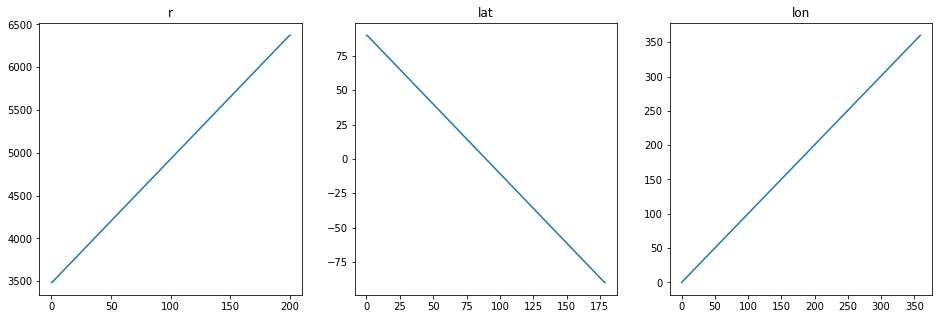

In [4]:
# R 3485km ~ 6371km
# 위도(height) 90 ~ -90
# 경도(width) 0 ~ 360

fig = plt.figure(figsize=(16, 5))
for i, f in enumerate(['r', 'lat', 'lon']):
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot(netcdf[f][:])
    ax.set_title(f)
plt.show

In [5]:
features = ['vx', 'vy', 'vz',
            'temperature', 'temperature anomaly',
            'thermal conductivity', 'thermal expansivity',
            'spin transition-induced density anomaly']

In [6]:
for f in features:
    d = netcdf[f][:]
    print(f"{f}, max: {np.max(d)}, min: {np.min(d)}, mean: {np.mean(d)}, std: {np.std(d)}")

vx, max: 6.577527411621986e-09, min: -4.6032262446260575e-09, mean: 5.997419141173799e-12, std: 4.5536616144481457e-10
vy, max: 6.98470881133062e-09, min: -6.365510785144579e-09, mean: 1.5678626799631168e-11, std: 4.950784782131734e-10
vz, max: 8.644863491724664e-09, min: -6.987897815946553e-09, mean: -2.1504338240663223e-11, std: 5.119335511061252e-10
temperature, max: 3600.0, min: 293.0, mean: 2209.823486328125, std: 297.11285400390625
temperature anomaly, max: 1181.6605224609375, min: -1153.6026611328125, mean: 1.9567866325378418, std: 83.88551330566406
thermal conductivity, max: 0.7216781973838806, min: -0.8093354105949402, mean: -0.0009697281057015061, std: 0.05119603872299194
thermal expansivity, max: 8.352799341082573e-07, min: -2.7597404823609395e-06, mean: 1.3476065818807115e-09, std: 4.840795853056079e-08
spin transition-induced density anomaly, max: 115.05448150634766, min: -183.59925842285156, mean: 0.13343340158462524, std: 7.51217794418335


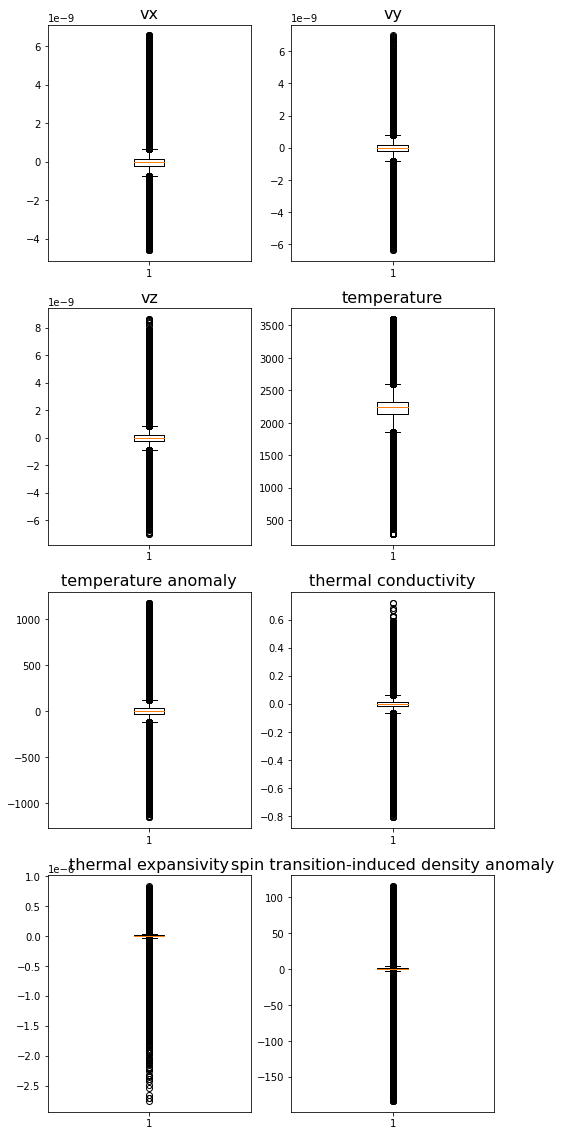

In [7]:
fig = plt.figure(figsize=(8, 20))
for i, f in enumerate(features):
    d = np.array(netcdf[f][:]).flatten()
    ax = fig.add_subplot(4, 2, i+1)
    ax.boxplot(d)
    ax.set_title(f, fontsize=16)    
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

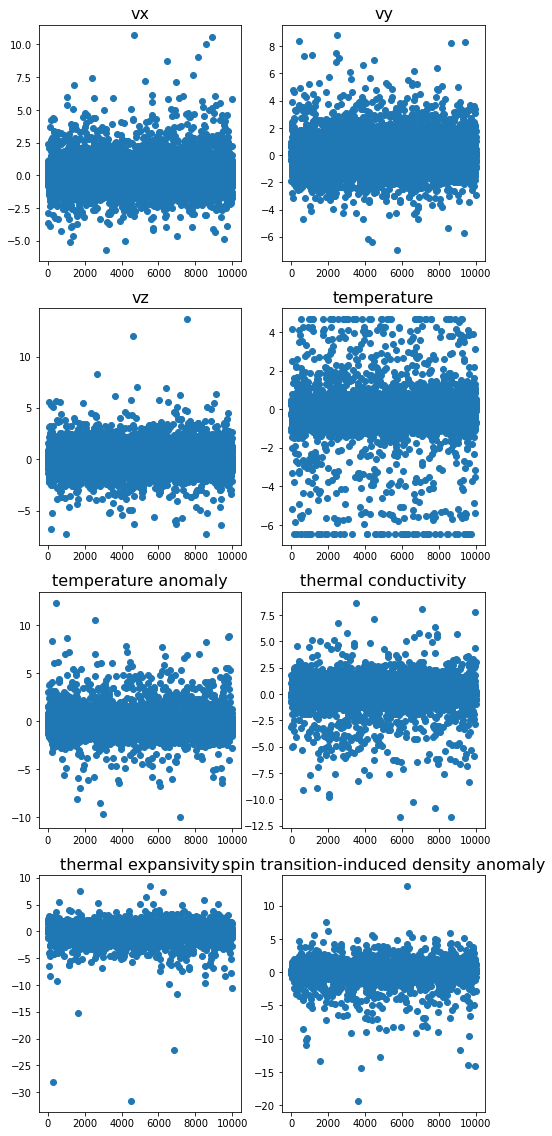

In [9]:
fig = plt.figure(figsize=(8, 20))
for i, f in enumerate(features):
    d = netcdf[f][:]
    x, y, z = d.shape
    d = d.reshape((x*y*z, 1))
    
    sc = StandardScaler()
    sc.fit(d)
    # sc.mean_
    # sc.scale_
    
    res = (d - sc.mean_) / sc.scale_
    # res = sc.transform(d)
    res = res.flatten()
    res = np.random.choice(res, 10000, replace=False)
    ax = fig.add_subplot(4, 2, i+1)
    ax.scatter(range(10000), res)
    ax.set_title(f, fontsize=16) 

plt.show()